<a href="https://colab.research.google.com/github/kamsibrahim/python-random-quote/blob/master/Project_Scope_GLOBAL_STOCK_MARKET(FINANCIAL_MARKETS)_ANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Scope: GLOBAL STOCK MARKET(FINANCIAL MARKETS) ANALYTICS

Objectives:

1.	Comparative Study of Global Markets – Returns, Volatility, Correlations.

2.	Predicting Nifty 50 open direction based on global indicators.(you can decide the target market-I have considered India for which Nifty50 is the benchmark index)

3.	Sentiment Analysis of Nifty 50 using X(twitter) data
Phase 1 is all about creating master data:

1.	List down global market indices:
a.	Nifty 50
b.	Dow Jones Index
c.	Nasdaq
d.	Hang Seng
e.	Nikkei 225
f.	Dax

2.	Check symbols for each of the index above which will help you to fetch data

3.	Check R/Python syntax to download data for each index for Six years.(from 1st Jan 2018 till 31st December 2023-OHLC Data)

4.	Add USA VIX data for Six years (Volatility Index- Fear Factor)

5.	Calculate daily returns based on close prices of each index: ( Yt-Yt-1)/(Yt-1)  * 100

6.	Check if daily returns follow Normal distribution

7.	Rename variables in each file (Example: Nifty50_Open,Nifty50_Adjclose)

8.	Merge all the above files with outer join (note that holidays are different globally)

9.	Impute missing data using LOCF method

10.	Create indicator variable for “Quarter”

11.	Create indicator variable for “Month”


In [ ]:
###1.	List down global market indices:
a.	Dow Jones Index-North America
b.	FTSE 100-UK
c.	Hang Seng Index-Hong Kong
d.	Nikkei 225-Japan
e.	Dax-Germany


In [ ]:
###2.	Check symbols for each of the index above which will help you to fetch data
a.	 "Dow Jones" = "^DJI",
b.	 "FTSE 100" = "^FTSE",
c.	 "Hang Seng Index" = "^HSI",
d.	"Nikkei 225" = "^N225",
e.	 "DAX" = "^GDAXI",


3.	Check R/Python syntax to download data for each index for Six years.(from 1st Jan 2018 till 31st December 2023-OHLC Data)

In [27]:
pip install yfinance

In [30]:
import yfinance as yf
import pandas as pd

#### Python syntax to download data for each index for Six years.(from 1st Jan 2018 till 31st December 2023-OHLC Data) -"Dow Jones" = "^DJI",

In [33]:
# Define the symbol for Dow Jones and the date range
symbol = "^DJI"
start_date = "2018-01-01"
end_date = "2023-12-31"



In [34]:
 dji_data = yf.download("^DJI", start=start_date, end=end_date, progress=False)

In [36]:
  ohlc_data = dji_data[['Open', 'High', 'Low', 'Close']]
  print(ohlc_data.head())

Price                              Open          High           Low  \
Ticker                             ^DJI          ^DJI          ^DJI   
Date                                                                  
2018-01-02 00:00:00+00:00  24809.349609  24864.189453  24741.699219   
2018-01-03 00:00:00+00:00  24850.449219  24941.919922  24825.550781   
2018-01-04 00:00:00+00:00  24964.859375  25105.960938  24963.269531   
2018-01-05 00:00:00+00:00  25114.919922  25299.789062  25112.009766   
2018-01-08 00:00:00+00:00  25308.400391  25311.990234  25235.410156   

Price                             Close  
Ticker                             ^DJI  
Date                                     
2018-01-02 00:00:00+00:00  24824.009766  
2018-01-03 00:00:00+00:00  24922.679688  
2018-01-04 00:00:00+00:00  25075.130859  
2018-01-05 00:00:00+00:00  25295.869141  
2018-01-08 00:00:00+00:00  25283.000000  


In [39]:
ohlc_data.to_csv("dji_ohlc_2018_2023.csv")
print("Data saved to 'dji_ohlc_2018_2023.csv'")

Data saved to 'dji_ohlc_2018_2023.csv'


In [ ]:
import os
print(os.getcwd())

/content


4.	Add USA VIX data for Six years (Volatility Index- Fear Factor)

In [40]:
import yfinance as yf
from google.colab import files

In [43]:
# Define the symbol for VIX and the date range
symbol_vix = "^VIX"
start_date = "2018-01-01"
end_date = "2023-12-31"
vix_data = yf.download(symbol_vix, start=start_date, end=end_date, progress=False)


In [44]:
ohlc_vix_data = vix_data[['Open', 'High', 'Low', 'Close']]

In [45]:
file_name_vix = "usa_vix_ohlc_2018_2023.csv"

In [46]:
ohlc_vix_data.to_csv(file_name_vix)

In [47]:
print(f"VIX data saved to '{file_name_vix}'")

VIX data saved to 'usa_vix_ohlc_2018_2023.csv'


In [62]:
files.download(file_name_vix)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4.	Add USA VIX data for Six years (Volatility Index- Fear Factor)

In [58]:
symbol_dji = "^DJI"
symbol_vix = "^VIX"
start_date = "2018-01-01"
end_date = "2023-12-31"
dji_data = yf.download(symbol_dji, start=start_date, end=end_date, progress=False)
dji_data = dji_data[['Open', 'High', 'Low', 'Close']]
dji_data.rename(columns={
        'Open': 'DJI_Open', 'High': 'DJI_High',
        'Low': 'DJI_Low', 'Close': 'DJI_Close'}, inplace=True)


 # Download VIX data

In [63]:
 vix_data = yf.download(symbol_vix, start=start_date, end=end_date, progress=False)
 vix_data = vix_data[['Close']]
 vix_data.rename(columns={'Close': 'VIX_Close'}, inplace=True)

# Merge the two datasets on Date

In [64]:
  combined_data = pd.merge(dji_data, vix_data, left_index=True, right_index=True, how='inner')

 # Save the combined data to a new CSV file

In [66]:
 combined_data.to_csv("dji_vix_ohlc_2018_2023.csv")
 print("Combined DJI and VIX data saved to 'dji_vix_ohlc_2018_2023.csv'")

Combined DJI and VIX data saved to 'dji_vix_ohlc_2018_2023.csv'


5.	Calculate daily returns based on close prices of each index: ( Yt-Yt-1)/(Yt-1)  * 100
  # Compute daily returns based on Close prices

In [67]:
dji_data = yf.download("^DJI", start=start_date, end=end_date, progress=False)


In [68]:
dji_data['Daily Return'] = dji_data['Close'].pct_change() * 100




In [103]:
 print(dji_data[['Close', 'Daily Return']].head())

Price                             Close Daily Return
Ticker                             ^DJI             
Date                                                
2018-01-02 00:00:00+00:00  24824.009766          NaN
2018-01-03 00:00:00+00:00  24922.679688          NaN
2018-01-04 00:00:00+00:00  25075.130859          NaN
2018-01-05 00:00:00+00:00  25295.869141          NaN
2018-01-08 00:00:00+00:00  25283.000000          NaN


# Save the results to CSV

In [69]:
dji_data[['Close', 'Daily Return']].to_csv("dji_daily_returns_2018_2023.csv")

In [70]:
print("Daily returns saved to 'dji_daily_returns_2018_2023.csv'")

Daily returns saved to 'dji_daily_returns_2018_2023.csv'


In [71]:
dji_data = yf.download(symbol, start=start_date, end=end_date, progress=False)

 # Select the Close prices

In [72]:
close_prices = dji_data['Close']

 # Calculate daily returns

In [73]:
 daily_returns = close_prices.pct_change() * 100  # (Yt - Yt-1) / Yt-1 * 100

 # Add daily returns as a new column to the original DataFrame

In [74]:
dji_data['Daily Return (%)'] = daily_returns

 # Display the first few rows

In [ ]:
print(dji_data[['Close', 'Daily Return (%)']].head())

Price                             Close Daily Return (%)
Ticker                             ^DJI                 
Date                                                    
2018-01-02 00:00:00+00:00  24824.009766              NaN
2018-01-03 00:00:00+00:00  24922.679688         0.397478
2018-01-04 00:00:00+00:00  25075.130859         0.611697
2018-01-05 00:00:00+00:00  25295.869141         0.880308
2018-01-08 00:00:00+00:00  25283.000000        -0.050874


 # Save to a CSV file

In [75]:
dji_data[['Close', 'Daily Return (%)']].to_csv("dji_daily_returns_2018_2023.csv")


In [76]:
print("Daily returns saved to 'dji_daily_returns_2018_2023.csv'")

Daily returns saved to 'dji_daily_returns_2018_2023.csv'



7.	Rename variables in each file (Example: Nifty50_Open,Nifty50_Adjclose)


 # Rename the columns

In [ ]:
import yfinance as yf
import pandas as pd

# Define the symbol for Dow Jones and the date range

In [ ]:
symbol = "^DJI"
start_date = "2018-01-01"
end_date = "2023-12-31"


In [ ]:
 dji_data = yf.download("^DJI", start=start_date, end=end_date, progress=False)

# Rename the columns

In [78]:
renamed_columns = {
        'Open': 'DJI_Open',
        'High': 'DJI_High',
        'Low': 'DJI_Low',
        'Close': 'DJI_Close',
        'Adj Close': 'DJI_Adj_Close',
        'Volume': 'DJI_Volume'
    }

In [79]:
dji_data.rename(columns=renamed_columns, inplace=True)

 # Add daily returns column

In [80]:
dji_data['DJI_Daily_Return (%)'] = dji_data['DJI_Close'].pct_change() * 100

In [81]:
  print(dji_data.head())

Price                     DJI_Adj_Close     DJI_Close      DJI_High  \
Ticker                             ^DJI          ^DJI          ^DJI   
Date                                                                  
2018-01-02 00:00:00+00:00  24824.009766  24824.009766  24864.189453   
2018-01-03 00:00:00+00:00  24922.679688  24922.679688  24941.919922   
2018-01-04 00:00:00+00:00  25075.130859  25075.130859  25105.960938   
2018-01-05 00:00:00+00:00  25295.869141  25295.869141  25299.789062   
2018-01-08 00:00:00+00:00  25283.000000  25283.000000  25311.990234   

Price                           DJI_Low      DJI_Open DJI_Volume  \
Ticker                             ^DJI          ^DJI       ^DJI   
Date                                                               
2018-01-02 00:00:00+00:00  24741.699219  24809.349609  341130000   
2018-01-03 00:00:00+00:00  24825.550781  24850.449219  456790000   
2018-01-04 00:00:00+00:00  24963.269531  24964.859375  403280000   
2018-01-05 00:00:00+00:

 # Save the modified data to a CSV file

In [82]:
dji_data.to_csv("renamed_dji_2018_2023.csv")

In [84]:
print("Renamed DJI data saved to 'renamed_dji_2018_2023.csv'")

Renamed DJI data saved to 'renamed_dji_2018_2023.csv'


check if daily return follow normal distribution

In [194]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, normaltest

# Define the symbol for Dow Jones and the date range

In [197]:
symbol = "^DJI"
start_date = "2018-01-01"
end_date = "2023-12-31"

# Download the data

In [198]:
 dji_data = yf.download(symbol, start=start_date, end=end_date, progress=False)

# Calculate daily returns

In [199]:
 daily_returns = dji_data['Close'].pct_change() * 100

# Drop NaN values (first return is NaN due to lack of previous day's data)

In [200]:
daily_returns = daily_returns.dropna()

 # Plot histogram of daily returns

In [201]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Count'>

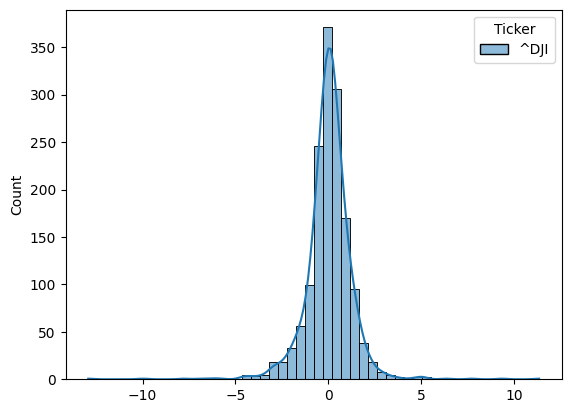

In [202]:
sns.histplot(daily_returns, kde=True, bins=50, color='blue')

Text(0.5, 1.0, 'Histogram of DJI Daily Returns')

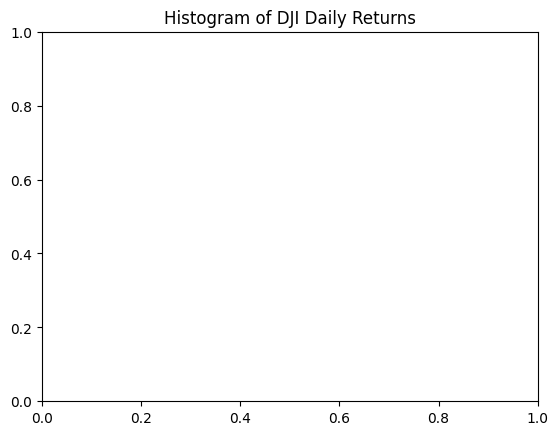

In [203]:
 plt.title("Histogram of DJI Daily Returns")

Text(0.5, 0, 'Daily Returns (%)')

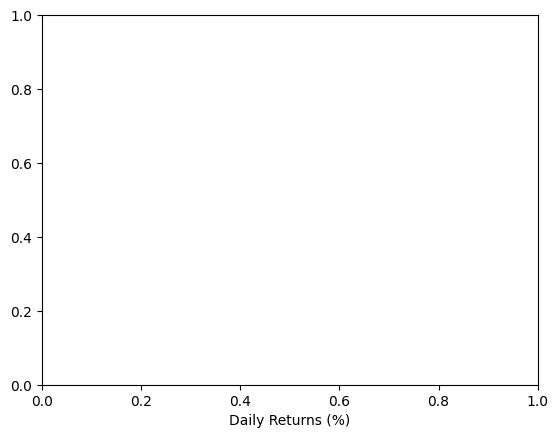

In [204]:
plt.xlabel("Daily Returns (%)")

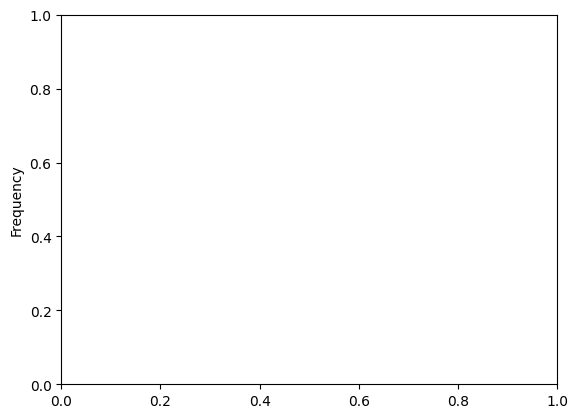

In [206]:
plt.ylabel("Frequency")
plt.show()

 # Q-Q Plot

In [207]:
from scipy.stats import probplot

Text(0.5, 1.0, 'Q-Q Plot for DJI Daily Returns')

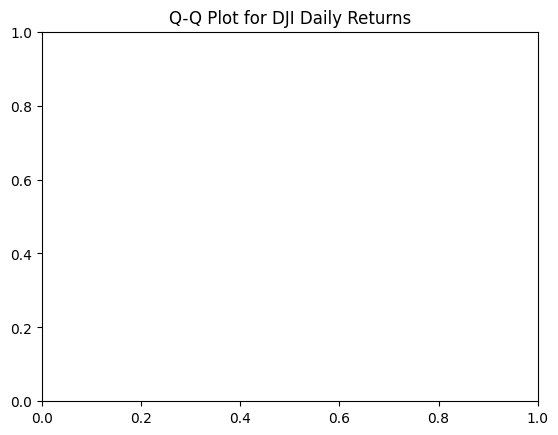

In [212]:
plt.title("Q-Q Plot for DJI Daily Returns")

In [213]:
 plt.show()

# Shapiro-Wilk Test

In [214]:
stat, p = shapiro(daily_returns)

In [215]:
 print(f"Shapiro-Wilk Test: Test Statistic = {stat}, p-value = {p}")

Shapiro-Wilk Test: Test Statistic = 0.8450969629304772, p-value = 5.1171485856043466e-36


In [219]:
 if p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

The daily returns are not normally distributed (Reject H0).


 # Kolmogorov-Smirnov Test

In [220]:
 ks_stat, ks_p = kstest(daily_returns, 'norm', args=(daily_returns.mean(), daily_returns.std()))

In [221]:
print(f"Kolmogorov-Smirnov Test: Test Statistic = {ks_stat}, p-value = {ks_p}")

Kolmogorov-Smirnov Test: Test Statistic = [0.10924995], p-value = [3.94728708e-16]


In [223]:
 if ks_p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

The daily returns are not normally distributed (Reject H0).


# D’Agostino and Pearson’s Test

In [225]:
 dag_stat, dag_p = normaltest(daily_returns)
 print(f"D’Agostino and Pearson Test: Test Statistic = {dag_stat}, p-value = {dag_p}")

D’Agostino and Pearson Test: Test Statistic = [437.54099125], p-value = [9.75395946e-96]


In [227]:
if dag_p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

The daily returns are not normally distributed (Reject H0).


b.	 "FTSE 100" = "^FTSE",

In [86]:
import yfinance as yf
import pandas as pd

# Define the symbol for FTSE and the date range

In [25]:
symbol = "^FTSE"
start_date = "2018-01-01"
end_date = "2023-12-31"

### download file
#### download data for each index for Six years.(from 1st Jan 2018 till 31st December 2023-OHLC Data)

In [87]:
ftse_data = yf.download("^FTSE", start=start_date, end=end_date, progress=False)

In [89]:
ohlc_data = ftse_data[['Open', 'High', 'Low', 'Close']]

In [90]:
print(ohlc_data.head())

Price                             Open         High          Low        Close
Ticker                           ^FTSE        ^FTSE        ^FTSE        ^FTSE
Date                                                                         
2018-01-02 00:00:00+00:00  7687.799805  7691.299805  7624.100098  7648.100098
2018-01-03 00:00:00+00:00  7648.100098  7689.899902  7640.500000  7671.100098
2018-01-04 00:00:00+00:00  7671.100098  7702.500000  7671.100098  7695.899902
2018-01-05 00:00:00+00:00  7695.899902  7727.700195  7689.799805  7724.200195
2018-01-08 00:00:00+00:00  7724.200195  7733.399902  7691.799805  7696.500000


### save data to csv file

In [91]:
ohlc_data.to_csv("ftse_ohlc_2018_2023.csv")

In [93]:
print("Data saved to 'ftse_ohlc_2018_2023.csv'")

Data saved to 'ftse_ohlc_2018_2023.csv'


### ### Add USA VIX data for Six years (Volatility Index- Fear Factor)

In [65]:
import yfinance as yf
import pandas as pd

# Define the symbol for VIX and the date range

In [104]:
symbol_ftse = "^FTSE"
symbol_vix = "^VIX"
start_date = "2018-01-01"
end_date = "2023-12-31"

In [105]:
ftse_data_data = yf.download(symbol_ftse, start=start_date, end=end_date, progress=False)

In [99]:
ftse_data_data = ftse_data_data[['Open', 'High', 'Low', 'Close']]

In [106]:
ftse_data_data.rename(columns={
        'Open': 'FTSE_Open', 'High': 'FTSE_High',
        'Low': 'FTSE_Low', 'Close': 'FTSE_Close'}, inplace=True)

# Download VIX data

In [107]:
vix_data = yf.download(symbol_vix, start=start_date, end=end_date, progress=False)

In [109]:
vix_data = vix_data[['Close']]

 # Keep only the Close price for VIX

In [89]:
 vix_data.rename(columns={'Close': 'VIX_Close'}, inplace=True)

# Merge the two datasets on Date

In [110]:
 combined_data = pd.merge(ftse_data, vix_data, left_index=True, right_index=True, how='inner')



# Save the combined data to a new CSV file

In [111]:
combined_data.to_csv("dji_vix_ohlc_2018_2023.csv")


In [112]:
print("Combined FTSE and VIX data saved to 'ftse_vix_ohlc_2018_2023.csv'")

Combined FTSE and VIX data saved to 'ftse_vix_ohlc_2018_2023.csv'


### Calculate daily returns based on close prices of each index: ( Yt-Yt-1)/(Yt-1) * 100

### Compute daily returns based on Close prices

In [113]:
ftse_data = yf.download("^FTSE", start=start_date, end=end_date, progress=False)

In [114]:
ftse_data['Daily Return'] = ftse_data['Close'].pct_change() * 100

In [115]:
print(ftse_data[['Close', 'Daily Return']].head())

Price                            Close Daily Return
Ticker                           ^FTSE             
Date                                               
2018-01-02 00:00:00+00:00  7648.100098          NaN
2018-01-03 00:00:00+00:00  7671.100098     0.300728
2018-01-04 00:00:00+00:00  7695.899902     0.323289
2018-01-05 00:00:00+00:00  7724.200195     0.367732
2018-01-08 00:00:00+00:00  7696.500000    -0.358616


### Save the results to CSV

In [116]:
ftse_data[['Close', 'Daily Return']].to_csv("ftse_daily_returns_2018_2023.csv")

In [117]:
print("Daily returns saved to 'ftse_daily_returns_2018_2023.csv'")

Daily returns saved to 'ftse_daily_returns_2018_2023.csv'


In [118]:
ftse_data = yf.download(symbol, start=start_date, end=end_date, progress=False)

### Select the Close prices

In [119]:
close_prices = ftse_data['Close']

### Calculate daily returns

In [133]:
daily_returns = close_prices.pct_change() * 100  # (Yt - Yt-1) / Yt-1 * 100

### Add daily returns as a new column to the original DataFrame

In [134]:
ftse_data['Daily Return (%)'] = daily_returns

## Display the first few rows

In [135]:
print(ftse_data[['Close', 'Daily Return (%)']].head())

Price                             Close Daily Return (%)
Ticker                             ^DJI                 
Date                                                    
2018-01-02 00:00:00+00:00  24824.009766              NaN
2018-01-03 00:00:00+00:00  24922.679688              NaN
2018-01-04 00:00:00+00:00  25075.130859              NaN
2018-01-05 00:00:00+00:00  25295.869141              NaN
2018-01-08 00:00:00+00:00  25283.000000              NaN


####  Save to a CSV file ###

In [137]:
ftse_data[['Close', 'Daily Return (%)']].to_csv("ftse_daily_returns_2018_2023.csv")
print("Daily returns saved to 'ftse_daily_returns_2018_2023.csv'")

Daily returns saved to 'ftse_daily_returns_2018_2023.csv'




###  Rename variables in each file (Example: ftse_Open,ftse_Adjclose)
Rename the columns

In [120]:
import yfinance as yf
import pandas as pd

### Define the symbol for FTSE and the date range



In [138]:
symbol = "^FTSE"
start_date = "2018-01-01"
end_date = "2023-12-31"
FTSE_data = yf.download("^FTSE", start=start_date, end=end_date, progress=False)

### Rename the columns

In [139]:
renamed_columns = {
        'Open': 'FTSE_Open',
        'High': 'FTSE_High',
        'Low': 'FTSE_Low',
        'Close': 'FTSE_Close',
        'Adj Close': 'FTSE_Adj_Close',
        'Volume': 'FTSE_Volume',
    }

In [144]:
ftse_data.rename(columns=renamed_columns, inplace=True)

### Add daily returns column

In [143]:
ftse_data['FTSE_Daily_Return (%)'] = ftse_data['FTSE_Close'].pct_change() * 100
print(ftse_data.head())

Price                     FTSE_Adj_Close    FTSE_Close     FTSE_High  \
Ticker                              ^DJI          ^DJI          ^DJI   
Date                                                                   
2018-01-02 00:00:00+00:00   24824.009766  24824.009766  24864.189453   
2018-01-03 00:00:00+00:00   24922.679688  24922.679688  24941.919922   
2018-01-04 00:00:00+00:00   25075.130859  25075.130859  25105.960938   
2018-01-05 00:00:00+00:00   25295.869141  25295.869141  25299.789062   
2018-01-08 00:00:00+00:00   25283.000000  25283.000000  25311.990234   

Price                          FTSE_Low     FTSE_Open FTSE_Volume  \
Ticker                             ^DJI          ^DJI        ^DJI   
Date                                                                
2018-01-02 00:00:00+00:00  24741.699219  24809.349609   341130000   
2018-01-03 00:00:00+00:00  24825.550781  24850.449219   456790000   
2018-01-04 00:00:00+00:00  24963.269531  24964.859375   403280000   
2018-01-0

### Save the modified data to a CSV file ####

In [146]:
ftse_data.to_csv("renamed_ftse_2018_2023.csv")
print("Renamed FTSE data saved to 'renamed_ftse_2018_2023.csv'")

Renamed FTSE data saved to 'renamed_ftse_2018_2023.csv'


6.	Check if daily returns follow Normal distribution

In [135]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, normaltest


# Define the symbol for FTSE and the date range

In [138]:
symbol = "^FTSE"
start_date = "2018-01-01"
end_date = "2023-12-31"

# Download the data

In [139]:
ftse_data = yf.download(symbol, start=start_date, end=end_date, progress=False)

# Calculate daily returns # # Daily returns in percentage

In [141]:
 daily_returns = ftse_data['Close'].pct_change() * 100

 # Drop NaN values (first return is NaN due to lack of previous day's data)

In [143]:
 daily_returns = daily_returns.dropna()

   # Plot histogram of daily returns

In [144]:
 plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Count'>

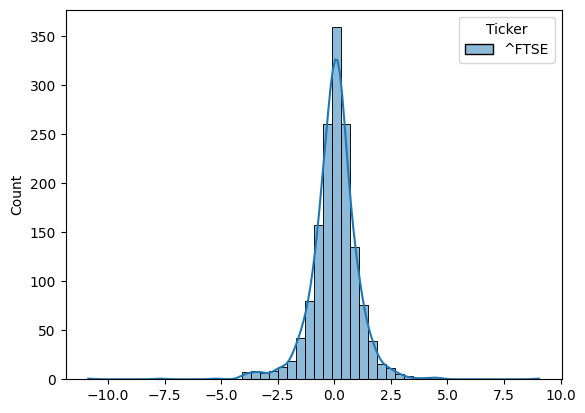

In [145]:
sns.histplot(daily_returns, kde=True, bins=50, color='blue')

Text(0.5, 1.0, 'Histogram of FTSE Daily Returns')

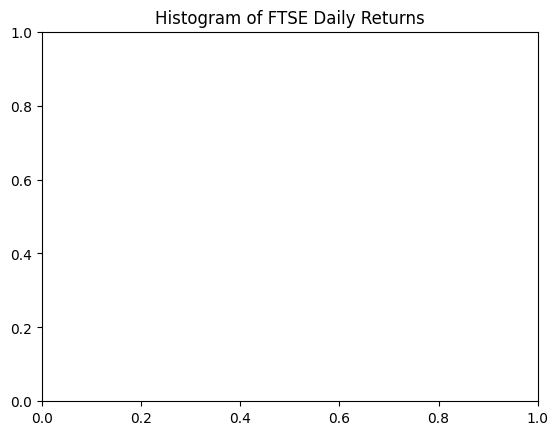

In [146]:
 plt.title("Histogram of FTSE Daily Returns")

Text(0.5, 0, 'Daily Returns (%)')

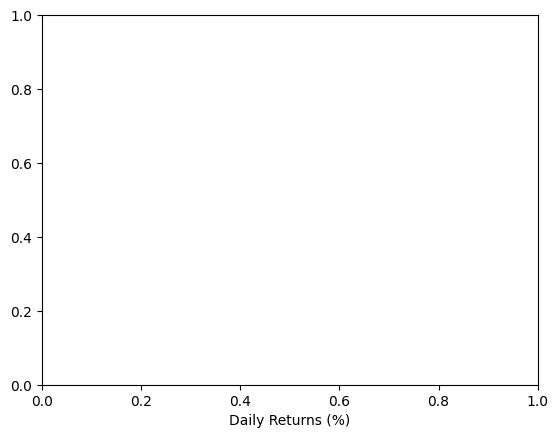

In [147]:
 plt.xlabel("Daily Returns (%)")

Text(0, 0.5, 'Frequency')

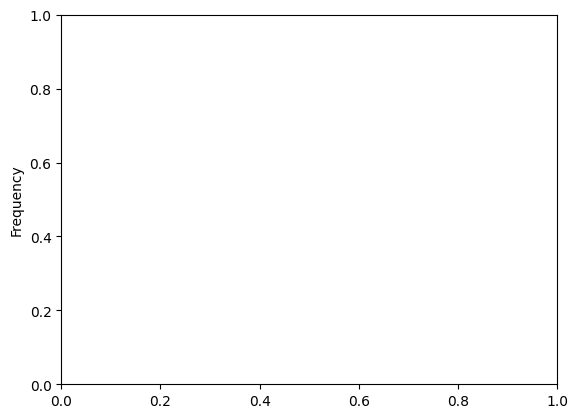

In [148]:
plt.ylabel("Frequency")

In [151]:
 plt.show()

  # Q-Q Plot

In [157]:
  from scipy.stats import probplot

Text(0.5, 1.0, 'Q-Q Plot for DJI Daily Returns')

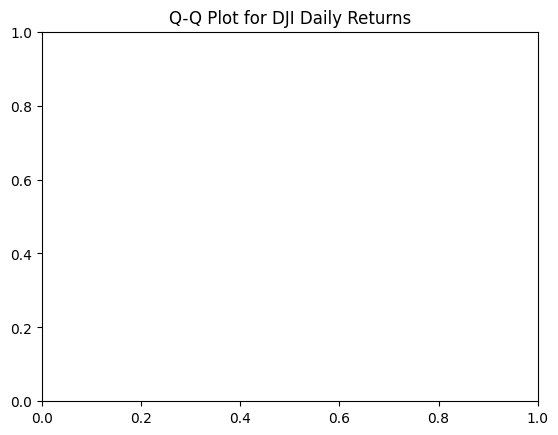

In [159]:
plt.title("Q-Q Plot for DJI Daily Returns")

In [160]:
  plt.show()

 # Shapiro-Wilk Test

In [161]:
 stat, p = shapiro(daily_returns)

In [162]:
print(f"Shapiro-Wilk Test: Test Statistic = {stat}, p-value = {p}")

Shapiro-Wilk Test: Test Statistic = 0.8909336750871426, p-value = 2.082761731284264e-31


In [174]:
 if p > 0.05:
  print("The daily returns are likely normally distributed (Fail to reject H0).")



In [178]:
if p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

The daily returns are not normally distributed (Reject H0).


  # Kolmogorov-Smirnov Test

In [181]:
ks_stat, ks_p = kstest(daily_returns, 'norm', args=(daily_returns.mean(), daily_returns.std()))

In [182]:
print(f"Kolmogorov-Smirnov Test: Test Statistic = {ks_stat}, p-value = {ks_p}")

Kolmogorov-Smirnov Test: Test Statistic = [0.09010286], p-value = [3.93568854e-11]


In [184]:
if ks_p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

The daily returns are not normally distributed (Reject H0).


  # D’Agostino and Pearson’s Test

In [185]:
dag_stat, dag_p = normaltest(daily_returns)

In [186]:
 print(f"D’Agostino and Pearson Test: Test Statistic = {dag_stat}, p-value = {dag_p}")

D’Agostino and Pearson Test: Test Statistic = [467.83869109], p-value = [2.5711003e-102]


In [188]:
if dag_p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

The daily returns are not normally distributed (Reject H0).


c.	 "Hang Seng Index" = "^HSI",

In [8]:
import yfinance as yf
import pandas as pd

# Define the symbol for "Hang Seng Index" and the date range

In [149]:
symbol = "^HSI"
start_date = "2018-01-01"
end_date = "2023-12-31"

### download file
#### download data for each index for Six years.(from 1st Jan 2018 till 31st December 2023-OHLC Data)

In [150]:
hsi_data = yf.download("^HSI", start=start_date, end=end_date, progress=False)

In [11]:
ohlc_data = hsi_data[['Open', 'High', 'Low', 'Close']]
print(ohlc_data.head())

Price                              Open          High           Low  \
Ticker                             ^HSI          ^HSI          ^HSI   
Date                                                                  
2018-01-02 00:00:00+00:00  30028.289062  30515.310547  30028.289062   
2018-01-03 00:00:00+00:00  30658.730469  30724.320312  30456.759766   
2018-01-04 00:00:00+00:00  30691.710938  30796.929688  30560.429688   
2018-01-05 00:00:00+00:00  30893.859375  30911.009766  30638.529297   
2018-01-08 00:00:00+00:00  30895.089844  30929.150391  30732.539062   

Price                             Close  
Ticker                             ^HSI  
Date                                     
2018-01-02 00:00:00+00:00  30515.310547  
2018-01-03 00:00:00+00:00  30560.949219  
2018-01-04 00:00:00+00:00  30736.480469  
2018-01-05 00:00:00+00:00  30814.640625  
2018-01-08 00:00:00+00:00  30899.529297  


In [153]:
ohlc_data.to_csv("hsi_ohlc_2018_2023.csv")
print("Data saved to 'hsi_ohlc_2018_2023.csv'")

Data saved to 'hsi_ohlc_2018_2023.csv'


### Add USA VIX data for Six years (Volatility Index- Fear Factor)
# Define the symbol for VIX and the date range


In [4]:
import yfinance as yf
import pandas as pd

In [157]:
symbol_dji = "^HSI"
symbol_vix = "^VIX"
start_date = "2018-01-01"
end_date = "2023-12-31"

### to add VIX with  hsi
# Download HSI data

In [159]:
hsi_data = yf.download("^HSI", start=start_date, end=end_date, progress=False)
hsi_data = hsi_data[['Open', 'High', 'Low', 'Close']]
hsi_data.rename(columns={
        'Open': 'HSI_Open', 'High': 'HSI_High',
        'Low': 'HSI_Low', 'Close': 'HSI_Close'}, inplace=True)



 # Download VIX data

In [160]:
vix_data = yf.download(symbol_vix, start=start_date, end=end_date, progress=False)


In [161]:
 vix_data = vix_data[['Close']]

In [162]:
vix_data.rename(columns={'Close': 'VIX_Close'}, inplace=True)

# Merge the two datasets on Date

In [163]:
combined_data = pd.merge(hsi_data, vix_data, left_index=True, right_index=True, how='inner')

 # Save the combined data to a new CSV file


In [164]:
combined_data.to_csv("hsi_vix_ohlc_2018_2023.csv")
print("Combined HSI and VIX data saved to 'hsi_vix_ohlc_2018_2023.csv'")

Combined HSI and VIX data saved to 'hsi_vix_ohlc_2018_2023.csv'


### Calculate daily returns based on close prices of each index: ( Yt-Yt-1)/(Yt-1) * 100

### Compute daily returns based on Close prices

In [165]:
hsi_data = yf.download("^HSI", start=start_date, end=end_date, progress=False)
hsi_data['Daily Return'] = hsi_data['Close'].pct_change() * 100
print(hsi_data[['Close', 'Daily Return']].head())

Price                             Close Daily Return
Ticker                             ^HSI             
Date                                                
2018-01-02 00:00:00+00:00  30515.310547          NaN
2018-01-03 00:00:00+00:00  30560.949219     0.149560
2018-01-04 00:00:00+00:00  30736.480469     0.574365
2018-01-05 00:00:00+00:00  30814.640625     0.254291
2018-01-08 00:00:00+00:00  30899.529297     0.275482


### Save the results to CSV

In [17]:
hsi_data[['Close', 'Daily Return']].to_csv("hsi_daily_returns_2018_2023.csv")

In [167]:
print("Daily returns saved to 'hsi_daily_returns_2018_2023.csv'")

Daily returns saved to 'hsi_daily_returns_2018_2023.csv'


In [169]:
hsi_data = yf.download("^HSI", start=start_date, end=end_date, progress=False)

### Select the Close prices

In [170]:
close_prices = hsi_data['Close']

### Calculate daily returns

In [171]:
daily_returns = close_prices.pct_change() * 100  # (Yt - Yt-1) / Yt-1 * 100

### Add daily returns as a new column to the original DataFrame

In [172]:
hsi_data['Daily Return (%)'] = daily_returns

## Display the first few rows

In [173]:
print(hsi_data[['Close', 'Daily Return (%)']].head())

Price                             Close Daily Return (%)
Ticker                             ^HSI                 
Date                                                    
2018-01-02 00:00:00+00:00  30515.310547              NaN
2018-01-03 00:00:00+00:00  30560.949219         0.149560
2018-01-04 00:00:00+00:00  30736.480469         0.574365
2018-01-05 00:00:00+00:00  30814.640625         0.254291
2018-01-08 00:00:00+00:00  30899.529297         0.275482


### Save to a CSV file

In [175]:
hsi_data[['Close', 'Daily Return (%)']].to_csv("hsi_daily_returns_2018_2023.csv")
print("Daily returns saved to 'hsi_daily_returns_2018_2023.csv'")

Daily returns saved to 'hsi_daily_returns_2018_2023.csv'


###  Rename variables in each file
Rename the columns


In [50]:
import yfinance as yf
import pandas as pd

### Define the symbol for HSI and the date range:

In [178]:
symbol = "^HSI"
start_date = "2018-01-01"
end_date = "2023-12-31"
hsi_data = yf.download("^HSI", start=start_date, end=end_date, progress=False)

### Rename the columns

In [176]:
renamed_columns = {
        'Open': 'HSI_Open',
        'High': 'HSI_High',
        'Low': 'HSI_Low',
        'Close': 'HSI_Close',
        'Adj Close': 'HSI_Adj_Close',
        'Volume': 'HSI_Volume'

    }

In [179]:
hsi_data.rename(columns=renamed_columns, inplace=True)

In [29]:
renamed_columns = {
     'ViX_Close': 'VIX',
    }



### Add daily returns column

In [181]:
hsi_data['HSI_Daily_Return (%)'] = hsi_data['HSI_Close'].pct_change() * 100
print(hsi_data.head())

Price                     HSI_Adj_Close     HSI_Close      HSI_High  \
Ticker                             ^HSI          ^HSI          ^HSI   
Date                                                                  
2018-01-02 00:00:00+00:00  30515.310547  30515.310547  30515.310547   
2018-01-03 00:00:00+00:00  30560.949219  30560.949219  30724.320312   
2018-01-04 00:00:00+00:00  30736.480469  30736.480469  30796.929688   
2018-01-05 00:00:00+00:00  30814.640625  30814.640625  30911.009766   
2018-01-08 00:00:00+00:00  30899.529297  30899.529297  30929.150391   

Price                           HSI_Low      HSI_Open  HSI_Volume  \
Ticker                             ^HSI          ^HSI        ^HSI   
Date                                                                
2018-01-02 00:00:00+00:00  30028.289062  30028.289062  2442333400   
2018-01-03 00:00:00+00:00  30456.759766  30658.730469  2309467700   
2018-01-04 00:00:00+00:00  30560.429688  30691.710938  2995571100   
2018-01-05 00:00:

### Save the modified data to a CSV file ####

In [184]:
hsi_data.to_csv("renamed_hsi_2018_2023.csv")
print("Renamed HSI data saved to 'renamed_hsi_2018_2023.csv'")

Renamed HSI data saved to 'renamed_hsi_2018_2023.csv'


6.Check if daily returns follow Normal distribution

In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, normaltest

# Define the symbol for HSI and the date range

In [35]:
symbol = "^HSI"
start_date = "2018-01-01"
end_date = "2023-12-31"



In [36]:
hsi_data = yf.download("^HSI", start=start_date, end=end_date, progress=False)

# Calculate daily returns

In [37]:
daily_returns = hsi_data['Close'].pct_change() * 100

 # Drop NaN values (first return is NaN due to lack of previous day's data)

In [38]:
 daily_returns = daily_returns.dropna()

# Plot histogram of daily returns


In [40]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Count'>

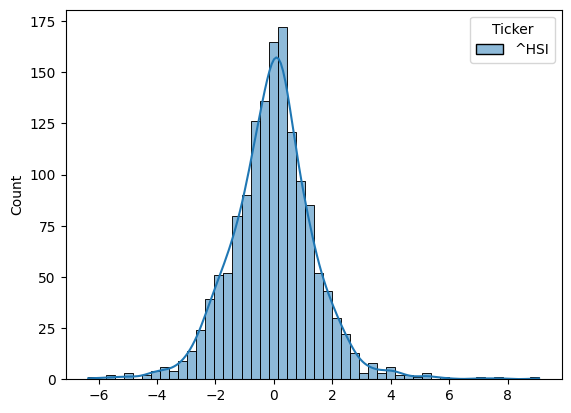

In [41]:
sns.histplot(daily_returns, kde=True, bins=50, color='blue')

Text(0.5, 1.0, 'Histogram of HSI Daily Returns')

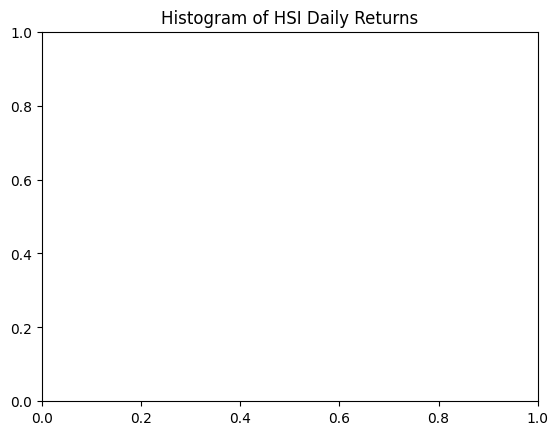

In [42]:
plt.title("Histogram of HSI Daily Returns")

Text(0.5, 0, 'Daily Returns (%)')

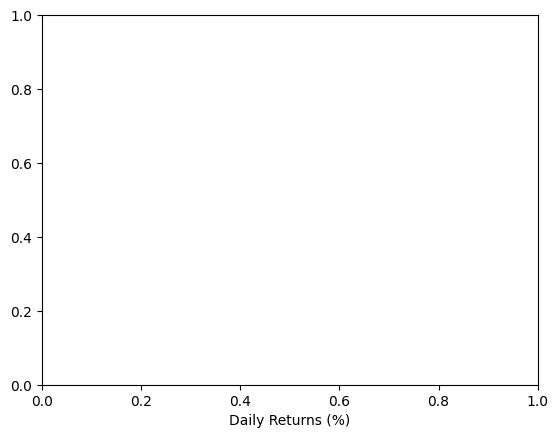

In [43]:
plt.xlabel("Daily Returns (%)")

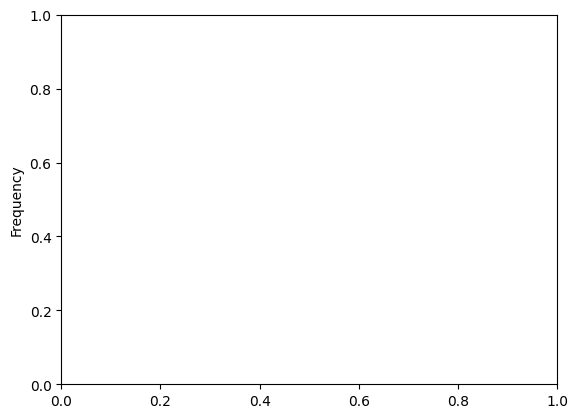

In [49]:
 plt.ylabel("Frequency")
 plt.show()


In [48]:
 plt.show()

 # Q-Q Plot

In [59]:
from scipy.stats import probplot

Text(0.5, 1.0, 'Q-Q Plot for HSI Daily Returns')

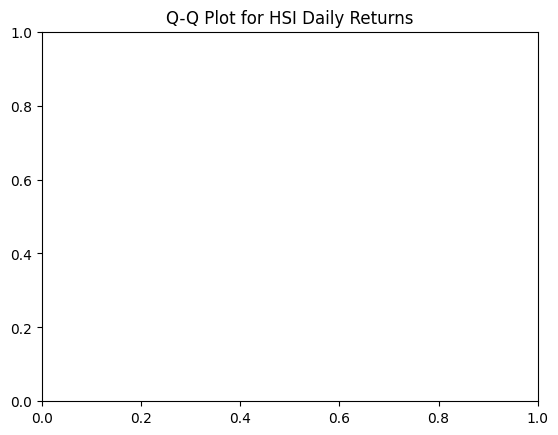

In [62]:
plt.title("Q-Q Plot for HSI Daily Returns")

In [64]:
 plt.show()

 # Shapiro-Wilk Test


In [65]:
stat, p = shapiro(daily_returns)


In [66]:
print(f"Shapiro-Wilk Test: Test Statistic = {stat}, p-value = {p}")


Shapiro-Wilk Test: Test Statistic = 0.9701753592611049, p-value = 6.673193576369432e-17


In [73]:
if p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")


The daily returns are not normally distributed (Reject H0).


 # Kolmogorov-Smirnov Test

In [74]:
 ks_stat, ks_p = kstest(daily_returns, 'norm', args=(daily_returns.mean(), daily_returns.std()))


In [75]:
print(f"Kolmogorov-Smirnov Test: Test Statistic = {ks_stat}, p-value = {ks_p}")

Kolmogorov-Smirnov Test: Test Statistic = [0.05072228], p-value = [0.00097458]


In [79]:
 if ks_p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

The daily returns are not normally distributed (Reject H0).


 # D’Agostino and Pearson’s Test


In [82]:
 dag_stat, dag_p = normaltest(daily_returns)
print(f"D’Agostino and Pearson Test: Test Statistic = {dag_stat}, p-value = {dag_p}")

D’Agostino and Pearson Test: Test Statistic = [134.35729475], p-value = [6.67858017e-30]


In [83]:
if dag_p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")


The daily returns are not normally distributed (Reject H0).


#####   "Nikkei 225" = "^N225"######

In [186]:
import yfinance as yf
import pandas as pd

# Define the symbol for Nikkei 225 and the date range

In [187]:
symbol = "^N225"
start_date = "2018-01-01"
end_date = "2023-12-31"


### download file
#### download data for each index for Six years.(from 1st Jan 2018 till 31st December 2023-OHLC Data)

In [188]:
n225_data = yf.download("^N225", start=start_date, end=end_date, progress=False)

In [189]:
ohlc_data = n225_data[['Open', 'High', 'Low', 'Close']]
print(ohlc_data.head())

Price                              Open          High           Low  \
Ticker                            ^N225         ^N225         ^N225   
Date                                                                  
2018-01-04 00:00:00+00:00  23073.730469  23506.330078  23065.199219   
2018-01-05 00:00:00+00:00  23643.000000  23730.470703  23520.519531   
2018-01-09 00:00:00+00:00  23948.970703  23952.609375  23789.029297   
2018-01-10 00:00:00+00:00  23832.810547  23864.759766  23755.449219   
2018-01-11 00:00:00+00:00  23656.390625  23734.970703  23601.839844   

Price                             Close  
Ticker                            ^N225  
Date                                     
2018-01-04 00:00:00+00:00  23506.330078  
2018-01-05 00:00:00+00:00  23714.529297  
2018-01-09 00:00:00+00:00  23849.990234  
2018-01-10 00:00:00+00:00  23788.199219  
2018-01-11 00:00:00+00:00  23710.429688  


In [190]:
ohlc_data.to_csv("n225_ohlc_2018_2023.csv")
print("Data saved to 'n225_ohlc_2018_2023.csv'")

Data saved to 'n225_ohlc_2018_2023.csv'


### Add USA VIX data for Six years (Volatility Index- Fear Factor)


# Define the symbol for VIX and the date range

In [191]:
symbol_dji = "^N225"
symbol_vix = "^VIX"
start_date = "2018-01-01"
end_date = "2023-12-31"

### to add VIX with  N255

In [192]:
 n225_data_data = yf.download("^N225", start=start_date, end=end_date, progress=False)
n225_data = n225_data[['Open', 'High', 'Low', 'Close']]
n225_data_data.rename(columns={
        'Open': 'N225_Open', 'High': 'N225_High',
        'Low': 'N225_Low', 'Close': 'N225_Close'}, inplace=True)



 # Download VIX data


In [109]:
vix_data = yf.download(symbol_vix, start=start_date, end=end_date, progress=False)
vix_data = vix_data[['Close']]
vix_data.rename(columns={'Close': 'VIX_Close'}, inplace=True)

# Merge the two datasets on Date


In [193]:
combined_data = pd.merge(n225_data_data, vix_data, left_index=True, right_index=True, how='inner')

# Save the combined data to a new CSV file

In [195]:
combined_data.to_csv("n225_vix_ohlc_2018_2023.csv")
print("Combined N225 and VIX data saved to 'n225_vix_ohlc_2018_2023.csv'")


Combined N225 and VIX data saved to 'n225_vix_ohlc_2018_2023.csv'


### Calculate daily returns based on close prices of each index: ( Yt-Yt-1)/(Yt-1) * 100

### Compute daily returns based on Close price

In [198]:
n225_data_data = yf.download("^N225", start=start_date, end=end_date, progress=False)
n225_data['Daily Return'] = n225_data['Close'].pct_change() * 100
print(n225_data[['Close', 'Daily Return']].head())

Price                             Close Daily Return
Ticker                            ^N225             
Date                                                
2018-01-04 00:00:00+00:00  23506.330078          NaN
2018-01-05 00:00:00+00:00  23714.529297          NaN
2018-01-09 00:00:00+00:00  23849.990234          NaN
2018-01-10 00:00:00+00:00  23788.199219          NaN
2018-01-11 00:00:00+00:00  23710.429688          NaN


### Save the results to CSV

In [200]:
n225_data[['Close', 'Daily Return']].to_csv("n225_daily_returns_2018_2023.csv")
print("Daily returns saved to 'n25_daily_returns_2018_2023.csv'")

Daily returns saved to 'n25_daily_returns_2018_2023.csv'


In [201]:
n225_data = yf.download("^N225", start=start_date, end=end_date, progress=False)

### Select the Close prices

In [202]:
close_prices = n225_data['Close']

### Calculate daily returns

In [203]:
daily_returns = close_prices.pct_change() * 100  # (Yt - Yt-1) / Yt-1 * 100

### Add daily returns as a new column to the original DataFrame

In [204]:
n225_data['Daily Return (%)'] = daily_returns
print(n225_data[['Close', 'Daily Return (%)']].head())


Price                             Close Daily Return (%)
Ticker                            ^N225                 
Date                                                    
2018-01-04 00:00:00+00:00  23506.330078              NaN
2018-01-05 00:00:00+00:00  23714.529297         0.885716
2018-01-09 00:00:00+00:00  23849.990234         0.571215
2018-01-10 00:00:00+00:00  23788.199219        -0.259082
2018-01-11 00:00:00+00:00  23710.429688        -0.326925


### Save to a CSV file

In [206]:
n225_data[['Close', 'Daily Return (%)']].to_csv("n225_daily_returns_2018_2023.csv")
print("Daily returns saved to 'n225_daily_returns_2018_2023.csv'")

Daily returns saved to 'n225_daily_returns_2018_2023.csv'


###  Rename variables in each file (Example: dji_Open,dji_Adjclose)
Rename the columns

In [136]:
import yfinance as yf
import pandas as pd

In [138]:
symbol = "^N225"
start_date = "2018-01-01"
end_date = "2023-12-31"

In [139]:
n225_data = yf.download("^N225", start=start_date, end=end_date, progress=False)

In [207]:
renamed_columns = {
        'Open': 'N225_Open',
        'High': 'N225_High',
        'Low': 'N225_Low',
        'Close': 'N225_Close',
        'Adj Close': 'N225_Adj_Close',
        'Volume': 'N225_Volume'
    }

In [208]:
n225_data.rename(columns=renamed_columns, inplace=True)


### Save the modified data to a CSV file ####

In [210]:
n225_data.to_csv("renamed_n225_2018_2023.csv")
print("Renamed N225 data saved to 'renamed_n225_2018_2023.csv'")

Renamed N225 data saved to 'renamed_n225_2018_2023.csv'


6.Check if daily returns follow Normal distribution

In [155]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, normaltest

# Drop NaN values (first return is NaN due to lack of previous day's data)

In [156]:
daily_returns = daily_returns.dropna()

# Plot histogram of daily returns

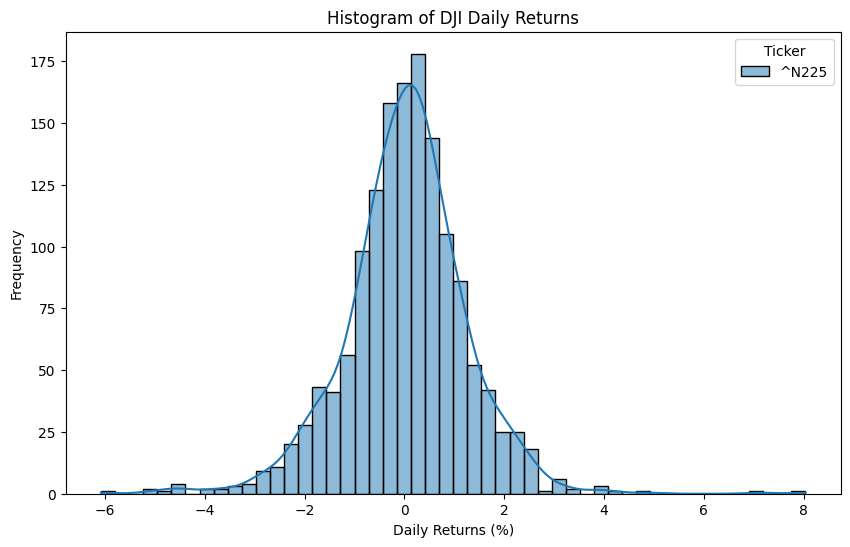

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, kde=True, bins=50, color='blue')
plt.title("Histogram of DJI Daily Returns")
plt.xlabel("Daily Returns (%)")
plt.ylabel("Frequency")
plt.show()




 # Q-Q Plot


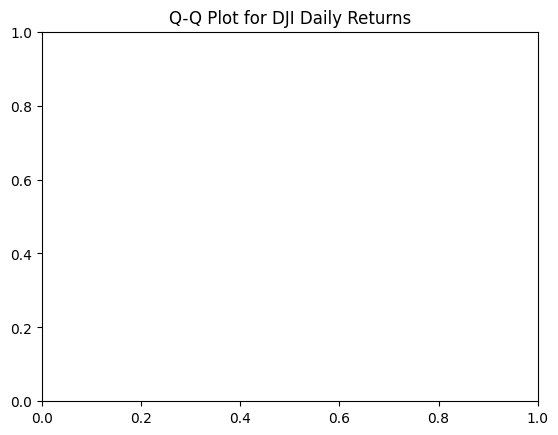

In [171]:
from scipy.stats import probplot
plt.title("Q-Q Plot for DJI Daily Returns")
plt.show()

 # Shapiro-Wilk Test

In [174]:
stat, p = shapiro(daily_returns)
print(f"Shapiro-Wilk Test: Test Statistic = {stat}, p-value = {p}")
if p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")



Shapiro-Wilk Test: Test Statistic = 0.9673329042405777, p-value = 1.1456132351106247e-17
The daily returns are not normally distributed (Reject H0).


# Kolmogorov-Smirnov Test

In [182]:
ks_stat, ks_p = kstest(daily_returns, 'norm', args=(daily_returns.mean(), daily_returns.std()))
print(f"Kolmogorov-Smirnov Test: Test Statistic = {ks_stat}, p-value = {ks_p}")


Kolmogorov-Smirnov Test: Test Statistic = [0.05291315], p-value = [0.00053234]


In [188]:
 if ks_p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

The daily returns are not normally distributed (Reject H0).


# D’Agostino and Pearson’s Test

In [190]:
dag_stat, dag_p = normaltest(daily_returns)
print(f"D’Agostino and Pearson Test: Test Statistic = {dag_stat}, p-value = {dag_p}")


D’Agostino and Pearson Test: Test Statistic = [123.20411625], p-value = [1.7642742e-27]


In [194]:
if dag_p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

The daily returns are not normally distributed (Reject H0).


e.	 "DAX" = "^GDAXI",

In [197]:
import yfinance as yf
import pandas as pd

# Define the symbol for "DAX" and the date range

In [211]:
symbol = "^GDAXI"
start_date = "2018-01-01"
end_date = "2023-12-31"

### download file
#### download data for each index for Six years.(from 1st Jan 2018 till 31st December 2023-OHLC Data)

In [212]:
gdaxi_data = yf.download("^GDAXI", start=start_date, end=end_date, progress=False)
ohlc_data = gdaxi_data[['Open', 'High', 'Low', 'Close']]
print(ohlc_data.head())

Price                              Open          High           Low  \
Ticker                           ^GDAXI        ^GDAXI        ^GDAXI   
Date                                                                  
2018-01-02 00:00:00+00:00  12897.690430  12924.160156  12745.150391   
2018-01-03 00:00:00+00:00  12916.179688  13023.589844  12893.049805   
2018-01-04 00:00:00+00:00  13065.980469  13208.349609  13062.669922   
2018-01-05 00:00:00+00:00  13219.110352  13332.799805  13219.110352   
2018-01-08 00:00:00+00:00  13399.620117  13407.820312  13334.160156   

Price                             Close  
Ticker                           ^GDAXI  
Date                                     
2018-01-02 00:00:00+00:00  12871.389648  
2018-01-03 00:00:00+00:00  12978.209961  
2018-01-04 00:00:00+00:00  13167.889648  
2018-01-05 00:00:00+00:00  13319.639648  
2018-01-08 00:00:00+00:00  13367.780273  


In [214]:
ohlc_data.to_csv("gdaxi_ohlc_2018_2023.csv")
print("Data saved to 'gdaxi_ohlc_2018_2023.csv'")

Data saved to 'gdaxi_ohlc_2018_2023.csv'


### Add USA VIX data for Six years (Volatility Index- Fear Factor)

In [218]:
symbol_gdaxi = "^GDAXI"
symbol_vix = "^VIX"
start_date = "2018-01-01"
end_date = "2023-12-31"

### to add VIX with  gdaxi

# Define symbols and date range
# Download DJI data

In [220]:
gdaxi_data = yf.download(symbol_gdaxi, start=start_date, end=end_date, progress=False)
gdaxi_data = gdaxi_data[['Open', 'High', 'Low', 'Close']]
gdaxi_data.rename(columns={
        'Open': 'GDAXI_Open', 'High': 'GDAXI_High',
        'Low': 'GDAXI_Low', 'Close': 'GDAXI_Close'}, inplace=True)



# Download VIX data

In [222]:
vix_data = yf.download(symbol_vix, start=start_date, end=end_date, progress=False)
vix_data = vix_data[['Close']]  # Keep only the Close price for VIX
vix_data.rename(columns={'Close': 'VIX_Close'}, inplace=True)



# Merge the two datasets on Date


In [223]:
combined_data = pd.merge(gdaxi_data, vix_data, left_index=True, right_index=True, how='inner')



 # Save the combined data to a new CSV file

In [220]:
combined_data.to_csv("gdaxi_vix_ohlc_2018_2023.csv")
print("Combined GDAXI and VIX data saved to 'gdaxi_vix_ohlc_2018_2023.csv'")


Combined GDAXI and VIX data saved to 'gdaxi_vix_ohlc_2018_2023.csv'


### Calculate daily returns based on close prices of each index: ( Yt-Yt-1)/(Yt-1) * 100

### Compute daily returns based on Close prices

In [230]:
gdaxi_data = yf.download("^GDAXI", start=start_date, end=end_date, progress=False)
gdaxi_data['Daily Return'] = gdaxi_data['Close'].pct_change() * 100
print(gdaxi_data[['Close', 'Daily Return']].head())

Price                             Close Daily Return
Ticker                           ^GDAXI             
Date                                                
2018-01-02 00:00:00+00:00  12871.389648          NaN
2018-01-03 00:00:00+00:00  12978.209961     0.829905
2018-01-04 00:00:00+00:00  13167.889648     1.461524
2018-01-05 00:00:00+00:00  13319.639648     1.152425
2018-01-08 00:00:00+00:00  13367.780273     0.361426


### Save the results to CSV

In [235]:
gdaxi_data[['Close', 'Daily Return']].to_csv("gdaxi_daily_returns_2018_2023.csv")
print("Daily returns saved to 'gdaxi_daily_returns_2018_2023.csv'")
gdaxi_data = yf.download(symbol, start=start_date, end=end_date, progress=False)



Daily returns saved to 'gdaxi_daily_returns_2018_2023.csv'


### Select the Close prices



In [236]:
close_prices = gdaxi_data['Close']

### Calculate daily returns

In [237]:
daily_returns = close_prices.pct_change() * 100  # (Yt - Yt-1) / Yt-1 * 100

### Add daily returns as a new column to the original DataFrame

In [239]:
gdaxi_data['Daily Return (%)'] = daily_returns
print(gdaxi_data[['Close', 'Daily Return (%)']].head())

Price                             Close Daily Return (%)
Ticker                           ^GDAXI                 
Date                                                    
2018-01-02 00:00:00+00:00  12871.389648              NaN
2018-01-03 00:00:00+00:00  12978.209961              NaN
2018-01-04 00:00:00+00:00  13167.889648              NaN
2018-01-05 00:00:00+00:00  13319.639648              NaN
2018-01-08 00:00:00+00:00  13367.780273              NaN


### Save to a CSV file

In [224]:
gdaxi_data[['Close', 'Daily Return (%)']].to_csv("gdaxi_daily_returns_2018_2023.csv")
print("Daily returns saved to 'gdaxi_daily_returns_2018_2023.csv'")

KeyError: "['Close' 'Daily Return (%)'] not in index"

###  Rename variables in each file (Example: dji_Open,dji_Adjclose)
Rename the columns

### Define the symbol for Dow Jones and the date range

In [225]:
symbol = "^GDAXI"
start_date = "2018-01-01"
end_date = "2023-12-31"
gdaxi_data = yf.download("^GDAXI", start=start_date, end=end_date, progress=False)

### Rename the columns

In [257]:
renamed_columns = {
        'Open': 'GDAXI_Open',
        'High': 'GDAXI_High',
        'Low': 'GDAXI_Low',
        'Close': 'GDAXI_Close',
        'Adj Close': 'GDAXI_Adj_Close',
        'Volume': 'GDAXI_Volume'
    }

In [226]:
 gdaxi_data.rename(columns=renamed_columns, inplace=True)

### Add daily returns column
# Display the first few rows

In [265]:
gdaxi_data['GDAXI_Daily_Return (%)'] = gdaxi_data['GDAXI_Close'].pct_change() * 100
print(gdaxi_data.head())


Price                     GDAXI_Adj_Close   GDAXI_Close    GDAXI_High  \
Ticker                             ^GDAXI        ^GDAXI        ^GDAXI   
Date                                                                    
2018-01-02 00:00:00+00:00    12871.389648  12871.389648  12924.160156   
2018-01-03 00:00:00+00:00    12978.209961  12978.209961  13023.589844   
2018-01-04 00:00:00+00:00    13167.889648  13167.889648  13208.349609   
2018-01-05 00:00:00+00:00    13319.639648  13319.639648  13332.799805   
2018-01-08 00:00:00+00:00    13367.780273  13367.780273  13407.820312   

Price                         GDAXI_Low    GDAXI_Open GDAXI_Volume  \
Ticker                           ^GDAXI        ^GDAXI       ^GDAXI   
Date                                                                 
2018-01-02 00:00:00+00:00  12745.150391  12897.690430     86049300   
2018-01-03 00:00:00+00:00  12893.049805  12916.179688     84809300   
2018-01-04 00:00:00+00:00  13062.669922  13065.980469    10119940

### Save the modified data to a CSV file ####

In [229]:
gdaxi_data.to_csv("renamed_gdaxi_2018_2023.csv")
print("Renamed GDAXI data saved to 'renamed_gdaxi_2018_2023.csv'")

Renamed GDAXI data saved to 'renamed_gdaxi_2018_2023.csv'


6.Check if daily returns follow Normal distribution

In [271]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, normaltest

# Plot histogram of daily returns

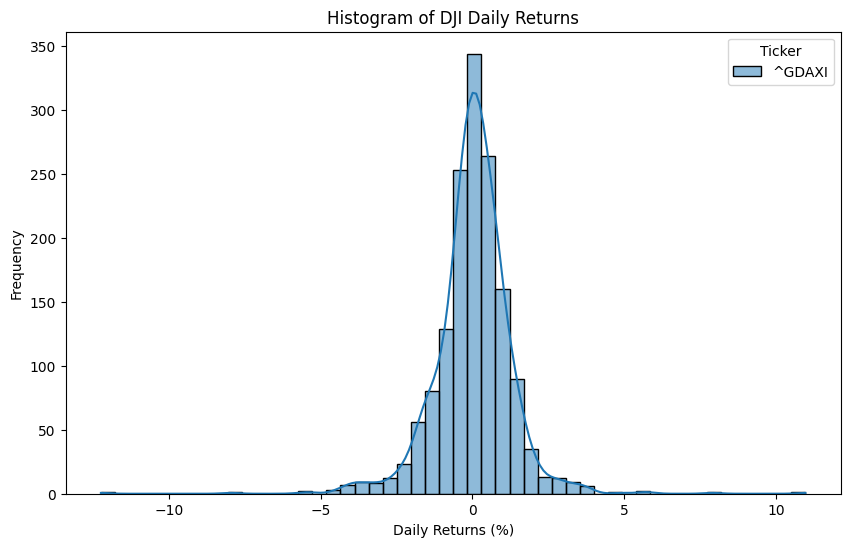

In [272]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, kde=True, bins=50, color='blue')
plt.title("Histogram of DJI Daily Returns")
plt.xlabel("Daily Returns (%)")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot

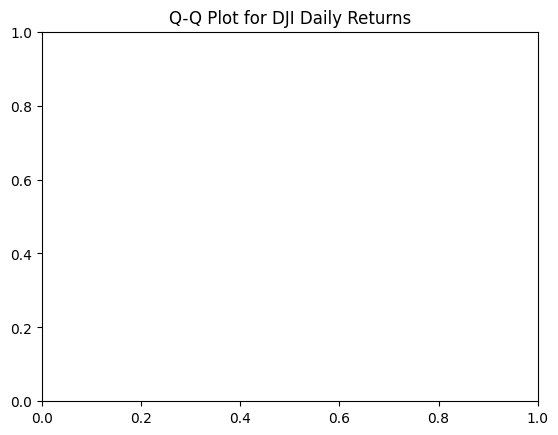

In [278]:
from scipy.stats import probplot
plt.title("Q-Q Plot for DJI Daily Returns")
plt.show()


    # Shapiro-Wilk Test

In [280]:
stat, p = shapiro(daily_returns)
print(f"Shapiro-Wilk Test: Test Statistic = {stat}, p-value = {p}")
if p > 0.05:
    print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
    print("The daily returns are not normally distributed (Reject H0).")

Shapiro-Wilk Test: Test Statistic = nan, p-value = nan
The daily returns are not normally distributed (Reject H0).


# Kolmogorov-Smirnov Test

In [284]:
ks_stat, ks_p = kstest(daily_returns, 'norm', args=(daily_returns.mean(), daily_returns.std()))
print(f"Kolmogorov-Smirnov Test: Test Statistic = {ks_stat}, p-value = {ks_p}")
if ks_p > 0.05:
        print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

Kolmogorov-Smirnov Test: Test Statistic = [nan], p-value = [nan]
The daily returns are not normally distributed (Reject H0).


 # D’Agostino and Pearson’s Test

In [287]:
dag_stat, dag_p = normaltest(daily_returns)
print(f"D’Agostino and Pearson Test: Test Statistic = {dag_stat}, p-value = {dag_p}")
if dag_p > 0.05:
    print("The daily returns are likely normally distributed (Fail to reject H0).")
else:
        print("The daily returns are not normally distributed (Reject H0).")

D’Agostino and Pearson Test: Test Statistic = [nan], p-value = [nan]
The daily returns are not normally distributed (Reject H0).


8.	Merge all the above files with outer join (note that holidays are different globally)

In [230]:
import pandas as pd

## determine the file path for all files

In [240]:
file_dji = "renamed_dji_2018_2023.csv"
file_ftse = "renamed_ftse_2018_2023.csv"
file_hsi = "renamed_hsi_2018_2023.csv"
file_n225 = "renamed_n225_2018_2023.csv"
file_gdaxi = "renamed_gdaxi_2018_2023.csv"


In [252]:
dji_data = pd.read_csv("renamed_dji_2018_2023.csv", parse_dates=["Date"], index_col="Date")
print

ValueError: Missing column provided to 'parse_dates': 'Date'